<a href="https://colab.research.google.com/github/AKSHYATA15/SIH-PROJECT/blob/main/Prod_Image_Descrip_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

In [2]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)

Mounted at /content/gdrive


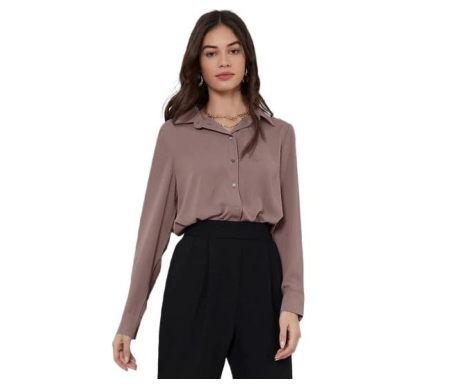

Predicted Description: the dress shirt is a long sleeved shirt with a collared neckline


In [36]:
images_dir = "/content/gdrive/MyDrive/SIH-PROJECT/1/IMAGE-SET-2/102.jpg"


from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = images_dir
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Optional: to hide axis labels
plt.show()

text = "The dress "
# Open the image and convert it to RGB
raw_image = Image.open(images_dir).convert('RGB')

# Process the image and text
inputs = processor(raw_image, text, return_tensors="pt")

# Generate the description
out = model.generate(**inputs)
predicted_caption = processor.decode(out[0], skip_special_tokens=True)

print("Predicted Description:", predicted_caption)

In [38]:
user_input = input("Please enter the product description :: ")

Please enter the product description :: t-shirt with long sleeves and V-neckline


In [39]:
user_description = text + " " + user_input

In [40]:
user_description

'The dress  t-shirt with long sleeves and V-neckline'

In [41]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 2.0 MB/s eta 0:00:00


In [42]:
from sentence_transformers import SentenceTransformer, util

# Load pre-trained model
model_ = SentenceTransformer('paraphrase-MiniLM-L6-v2')



modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [43]:
predicted_caption

'the dress shirt is a long sleeved shirt with a collared neckline'

In [46]:
# Sample phrases
phrase1 = predicted_caption
phrase2 = user_description

# Encode phrases into embeddings
embedding1 = model_.encode(phrase1, convert_to_tensor=True)
embedding2 = model_.encode(phrase2, convert_to_tensor=True)

# Calculate cosine similarity
cosine_similarity = util.pytorch_cos_sim(embedding1, embedding2)

# Check if the similarity is greater than 0.95
if cosine_similarity.item() > 0.95:

    print("Therefore, the description is accurate.")
else:

    print("Therefore, the description is not accurate.")


Therefore, the description is not accurate.
